## Statistics and Data Science 2 (Python)

# Final Project 

### Group: write your group
### Team members: list down your members

## Task 1 (Classification with prepared dataset (70% of mark)):
### Background information: 
We are constantly working to improve the quality of our products and services to grow our subscriber base and minimize churn. In our work we use a personal approach to subscribers.

To reduce churn, the company uses different channels of communication with customers. Each proposal must be addressed to a specific target group. In this task, you will have to use the available data to try to identify subscribers who will churn.


### Dataset details
Anonymized data about subscribers: subscriber service language, tariff plan, information on the volume of consumption of various operator services and others.

The **churn_rate_train.csv** file contains information to build the model.

Row format: 
- 3 categorical features (C1, C2, C3)
- 23 numeric features (N1, ..., N23) 
- the target variable - TARGET


### Task
Describe the stages of building a model, build a model, evaluate it and tell the business how to apply it, that is, a business interpretation is needed.

*Note: this is how the task was originally structured, you can use it as a guidance.*

## Marking scheme
1. Data Preparation - 20%
2. Model (variety, complexity, tunning) - 30%
3. Imbalance (approaching this issue) - 20%
4. Code quality - 10%
5. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

## Hints:
1. You are given with train dataset (contains both features and target), and test dataset (contains only features). For test dataset you should predict Target, and provide your predictions as Pandas Array. I will evaluate your predictions myself.
2. To estimate key metric on test dataset, I suggest to use 5-fold Cross Validation. **Note: you don't have access to Y-test, hence you can't calculate metric on test dataset. We are simulating real life competition.**
3. You should take F1-score as your main metric.
4. To get good mark, I recommend you:
- to try at least 3 models with default settings
- to optimize at least 1 model (i.e. do hyperparameter tuning)
- to try at least 3 different methods to tackle imbalanceness
- to build consolidated table with all results
- to predict based on best obtained model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# This is your dataset for training
df_train = pd.read_csv('churn_train.csv')
df_train.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,3234373639353330,313434,33,231.21,727.20,0.00,430.02,218.10,15.85,50.23,...,33,8,4,124,29,132,33,0,0,0
1,3430333334383330,343835,33,0.15,115.91,3565.02,268.58,156.62,0.00,59.07,...,134,0,47,232,87,232,134,0,0,0
2,3439383237353231,343636,33,66.29,1137.81,93.33,0.00,41.78,0.00,0.38,...,13,0,1,0,12,0,13,0,0,0
3,3339353736373733,343433,33,0.01,6.21,2333.79,258.10,41.23,67.80,20.45,...,51,72,25,118,26,200,51,0,0,0
4,3439313439343036,343835,31,33.12,1.42,59.54,58.58,12.72,3.35,3.18,...,14,5,7,44,7,49,14,0,0,0


In [3]:
# This is your dataset for testing, but without TARGET
# For this data you should obtain predicted Y
df_test = pd.read_csv('X_churn_test.csv')
df_test.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N14,N15,N16,N17,N18,N19,N20,N21,N22,N23
0,3531383839343233,343439,31,0.00,1210.58,9679.97,657.10,331.60,0.00,6.03,...,94,31,0,5,94,26,94,31,0,0
1,3235303635303039,3434,31,0.00,0.00,0.00,0.08,1.60,0.00,0.00,...,3,2,0,0,2,2,3,2,0,0
2,3433373930343038,343433,31,0.18,324.36,3611.99,129.02,677.98,5.12,0.00,...,7,21,3,0,4,21,7,21,0,0
3,3532373635343736,343637,31,0.00,0.00,0.00,69.57,72.17,0.00,5.88,...,20,21,0,3,20,18,20,21,0,0
4,3331323035323031,313435,33,189.21,4340.27,0.00,305.88,420.83,6.73,8.27,...,96,79,7,11,89,68,96,79,0,0


In [4]:
df_train.describe()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
count,4.112070e+05,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,...,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000,411207.000000
mean,3.125054e+15,327921.407666,31.631302,44.390397,938.026259,2877.612561,108.613362,62.777042,12.854688,9.466825,...,29.094964,10.441342,7.746619,38.723995,21.259645,49.663097,29.075740,0.047378,0.019224,0.049591
std,8.593942e+14,51001.329259,0.929501,228.466027,2282.175569,4939.904365,199.013605,99.755581,19.478867,16.789832,...,31.304190,14.849228,11.978159,50.371299,24.206020,58.825979,31.296398,0.706770,0.358201,0.217098
min,3.531360e+05,3138.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.231393e+15,323531.000000,31.000000,0.000000,0.000000,0.000000,2.780000,9.570000,0.000000,0.220000,...,8.000000,0.000000,1.000000,2.000000,4.000000,4.000000,8.000000,0.000000,0.000000,0.000000
50%,3.337374e+15,343230.000000,31.000000,0.000000,77.550000,107.580000,45.050000,33.020000,4.950000,3.300000,...,20.000000,5.000000,4.000000,22.000000,14.000000,32.000000,20.000000,0.000000,0.000000,0.000000
75%,3.437364e+15,343636.000000,33.000000,0.570000,788.535000,4253.415000,132.250000,77.570000,18.330000,11.550000,...,40.000000,15.000000,10.000000,56.000000,30.000000,73.000000,40.000000,0.000000,0.000000,0.000000
max,3.536383e+15,353036.000000,33.000000,27971.110000,96905.370000,201234.910000,9197.630000,4720.780000,441.880000,999.780000,...,1258.000000,350.000000,499.000000,1109.000000,1024.000000,1346.000000,1258.000000,118.000000,99.000000,1.000000


In [5]:
df_train['TARGET'].value_counts()

TARGET
0    390815
1     20392
Name: count, dtype: int64

In [6]:
df_train.isnull().sum()

C1        0
C2        0
C3        0
N1        0
N2        0
N3        0
N4        0
N5        0
N6        0
N7        0
N8        0
N9        0
N10       0
N11       0
N12       0
N13       0
N14       0
N15       0
N16       0
N17       0
N18       0
N19       0
N20       0
N21       0
N22       0
N23       0
TARGET    0
dtype: int64

In [7]:
df_train.drop_duplicates(inplace=True)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 411207 entries, 0 to 411206
Data columns (total 27 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   C1      411207 non-null  int64  
 1   C2      411207 non-null  int64  
 2   C3      411207 non-null  int64  
 3   N1      411207 non-null  float64
 4   N2      411207 non-null  float64
 5   N3      411207 non-null  float64
 6   N4      411207 non-null  float64
 7   N5      411207 non-null  float64
 8   N6      411207 non-null  float64
 9   N7      411207 non-null  float64
 10  N8      411207 non-null  float64
 11  N9      411207 non-null  float64
 12  N10     411207 non-null  float64
 13  N11     411207 non-null  float64
 14  N12     411207 non-null  float64
 15  N13     411207 non-null  float64
 16  N14     411207 non-null  int64  
 17  N15     411207 non-null  int64  
 18  N16     411207 non-null  int64  
 19  N17     411207 non-null  int64  
 20  N18     411207 non-null  int64  
 21  N19     41

### LabelEncoding

In [8]:
from sklearn.preprocessing import LabelEncoder
columns = ['C1','C2','C3']
def label_encode_columns(df, columns):
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
    return df
    
df_train = label_encode_columns(df_train, columns)

In [9]:
df_train.head()

,C1,C2,C3,N1,N2,N3,N4,N5,N6,N7,...,N15,N16,N17,N18,N19,N20,N21,N22,N23,TARGET
0,136849,17,2,231.21,727.20,0.00,430.02,218.10,15.85,50.23,...,33,8,4,124,29,132,33,0,0,0
1,229070,57,2,0.15,115.91,3565.02,268.58,156.62,0.00,59.07,...,134,0,47,232,87,232,134,0,0,0
2,330577,53,2,66.29,1137.81,93.33,0.00,41.78,0.00,0.38,...,13,0,1,0,12,0,13,0,0,0
3,222055,48,2,0.01,6.21,2333.79,258.10,41.23,67.80,20.45,...,51,72,25,118,26,200,51,0,0,0
4,326983,57,0,33.12,1.42,59.54,58.58,12.72,3.35,3.18,...,14,5,7,44,7,49,14,0,0,0


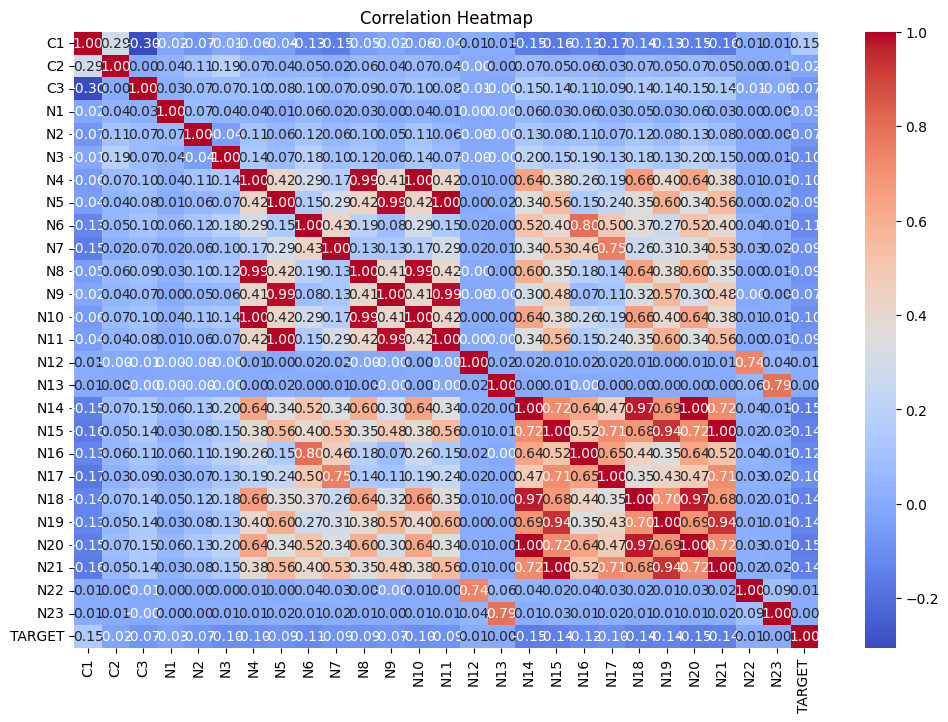

In [10]:
correlation_matrix = df_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

### Standardization and PCA

In [11]:
X = df_train.drop(columns=['TARGET'])
y = df_train['TARGET']

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

### SMOTE

In [16]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_res, y_res = smote.fit_resample(X_pca, y)
#test
X_test = df_test
X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import f1_score, make_scorer
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1 = make_scorer(f1_score)

results = []


for name, model in models.items():
    scores_1 = cross_val_score(model, X_res, y_res, cv=cv, scoring=f1)
    results.append({'Model': name, 'F1 Score Mean': scores_1.mean(), 'F1 Score Std': scores_1.std()})

In [18]:
results_df = pd.DataFrame(results)
print(results_df)

                 Model  F1 Score Mean  F1 Score Std
0  Logistic Regression       0.776401      0.000685
1        Random Forest       0.946382      0.000349
2        Decision Tree       0.892986      0.000993


### RandomOverSampler

In [19]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_pca, y)
results_1 = []


for name, model in models.items():
    scores_2 = cross_val_score(model, X_train_ros, y_train_ros, cv=cv, scoring=f1)
    results_1.append({'Model': name, 'F1 Score Mean': scores_2.mean(), 'F1 Score Std': scores_2.std()})

In [20]:
results_df_1 = pd.DataFrame(results_1)
print(results_df_1)

                 Model  F1 Score Mean  F1 Score Std
0  Logistic Regression       0.773012      0.000927
1        Random Forest       0.991115      0.000146
2        Decision Tree       0.977010      0.000336


### ADASYN

In [21]:
from imblearn.over_sampling import ADASYN

adasyn = ADASYN(random_state=42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_pca, y)

In [22]:
results_2 = []
for name, model in models.items():
    scores_3 = cross_val_score(model, X_res_adasyn, y_res_adasyn, cv=cv, scoring=f1)
    results_2.append({'Model': name, 'F1 Score Mean': scores_3.mean(), 'F1 Score Std': scores_3.std()})

In [23]:
results_df_2 = pd.DataFrame(results_2)
print(results_df_2)

                 Model  F1 Score Mean  F1 Score Std
0  Logistic Regression       0.750093      0.001035
1        Random Forest       0.946508      0.000371
2        Decision Tree       0.888047      0.000940


### Tuning RandomForest 

In [25]:
from sklearn.model_selection import RandomizedSearchCV, KFold

param_grid = {
    'n_estimators': [50, 100],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}


random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=20,
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)


random_search.fit(X_train_ros, y_train_ros)


best_rf = random_search.best_estimator_

print(f'Best Parameters for Tuned Random Forest: {random_search.best_params_}')


kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_scores = cross_val_score(best_rf, X_train_ros, y_train_ros, cv=kf, scoring='f1_weighted')

print(f'Tuned Random Forest F1: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}')

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Админ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
50 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
44 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Админ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Админ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Админ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py", 

Best Parameters for Tuned Random Forest: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': False}
Tuned Random Forest F1: 0.9647 ± 0.0005


In [34]:
from sklearn.metrics import classification_report, confusion_matrix

y_train_pred = best_rf.predict(X_train_ros)
print(classification_report(y_train_ros, y_train_pred))
print(confusion_matrix(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    390815
           1       0.94      1.00      0.97    390815

    accuracy                           0.97    781630
   macro avg       0.97      0.97      0.97    781630
weighted avg       0.97      0.97      0.97    781630

[[368054  22761]
 [   693 390122]]


### Predicting on test data

In [41]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_scaled, y)

In [50]:
from sklearn.feature_selection import RFE
estimator = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=estimator, n_features_to_select=20)
X_train_selected = rfe.fit_transform(X_train_ros, y_train_ros)
X_test_selected = rfe.transform(X_test_scaled)

In [51]:
best_rf = RandomForestClassifier(
    n_estimators=50, 
    max_features='sqrt', 
    max_depth=20, 
    min_samples_split=5, 
    min_samples_leaf=2, 
    bootstrap=False, 
    random_state=42
)
best_rf.fit(X_train_selected, y_train_ros)
y_test_pred = best_rf.predict(X_test_selected)

In [71]:
predictions = pd.DataFrame(y_test_pred, columns=['TARGET'])
print(predictions.value_counts())

TARGET
0         101999
1            803
Name: count, dtype: int64


In [72]:
import IPython.display as display
csv_filename = 'predictions.csv'
predictions.to_csv(csv_filename, columns=['TARGET'], index=False)

print(f"Predictions have been saved to {csv_filename}")
display.display(display.HTML(f"<a href='{csv_filename}' download>Download predictions.csv</a>"))

Predictions have been saved to predictions.csv


In [53]:
print(y_train_ros.value_counts())

TARGET
0    390815
1    390815
Name: count, dtype: int64


## Task 2 (Clustering with any dataset (30% of mark))
1. Select any dataset that will suit for clustering
2. Observe your data
3. Apply some data preparation
4. Apply clustering model
5. Visualise your obtained clusters

## Marking scheme
1. Data Preparation - 20%
2. Kmeans model - 30%
3. Visualisation - 20%
4. Code quality - 10%
5. Results and Defence - 20%

*Note: add comments and description of the approaches that you use, for example, for resolving the problem of imbalanced data. Write descriptions of techniques that you apply, and you should understand them as well.*

In [54]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

In [55]:
df = pd.read_csv('df.csv')

In [56]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [57]:
print(df.dtypes)

ID                   int64
Gender              object
Ever_Married        object
Age                  int64
Graduated           object
Profession          object
Work_Experience    float64
Spending_Score      object
Family_Size        float64
Var_1               object
dtype: object


In [58]:
missing_values = df.isnull().sum()
print(missing_values)

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64


In [59]:
categorical_columns = ['Ever_Married', 'Graduated','Profession', 'Var_1']

for column in categorical_columns:
    if df[column].isnull().sum() > 0: 
        mode_value = df[column].mode()[0]
        df[column] = df[column].fillna(mode_value)

In [60]:
numerical_columns = ['Age', 'Family_Size', 'Work_Experience']

for column in numerical_columns:
    if df[column].isnull().sum() > 0:
        median_value = df[column].median()
        df[column] = df[column].fillna(median_value)

In [61]:
missing_values = df.isnull().sum()
print(missing_values)

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
dtype: int64


In [62]:
from sklearn.preprocessing import LabelEncoder
label_columns = ['Gender', 'Ever_Married', 'Graduated']
onehot_columns = ['Profession', 'Var_1', 'Spending_Score']

def label_encode_columns(df, columns):
    le = LabelEncoder()
    for column in columns:
        df[column] = le.fit_transform(df[column])
    return df


def onehot_encode_columns(df, columns):
    df = pd.get_dummies(df, columns=columns)
    return df


df = label_encode_columns(df, label_columns)
df = onehot_encode_columns(df, onehot_columns)


df.to_csv('encoded_dataset.csv', index=False)
print(df.head())

       ID  Gender  Ever_Married  Age  Graduated  Work_Experience  Family_Size  \
0  458989       0             1   36          1              0.0          1.0   
1  458994       1             1   37          1              8.0          4.0   
2  458996       0             1   69          0              0.0          1.0   
3  459000       1             1   59          0             11.0          2.0   
4  459001       0             0   19          0              1.0          4.0   

   Profession_Artist  Profession_Doctor  Profession_Engineer  ...  \
0              False              False                 True  ...   
1              False              False                False  ...   
2               True              False                False  ...   
3              False              False                False  ...   
4              False              False                False  ...   

   Var_1_Cat_1  Var_1_Cat_2  Var_1_Cat_3  Var_1_Cat_4  Var_1_Cat_5  \
0        False        False 

In [63]:
columns_to_standardize = ['Age', 'Work_Experience', 'Family_Size']
scaler = StandardScaler()
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])
df.to_csv('standardized_data.csv', index=False)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,458989,0,1,-0.450948,1,-0.748105,-1.172097,False,False,True,...,False,False,False,False,False,True,False,False,False,True
1,458994,1,1,-0.391999,1,1.752242,0.792450,False,False,False,...,False,False,False,False,False,True,False,True,False,False
2,458996,0,1,1.494372,0,-0.748105,-1.172097,True,False,False,...,False,False,False,False,False,True,False,False,False,True
3,459000,1,1,0.904881,0,2.689872,-0.517248,False,False,False,...,False,False,False,False,False,True,False,False,True,False
4,459001,0,0,-1.453083,0,-0.435562,0.792450,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [64]:
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

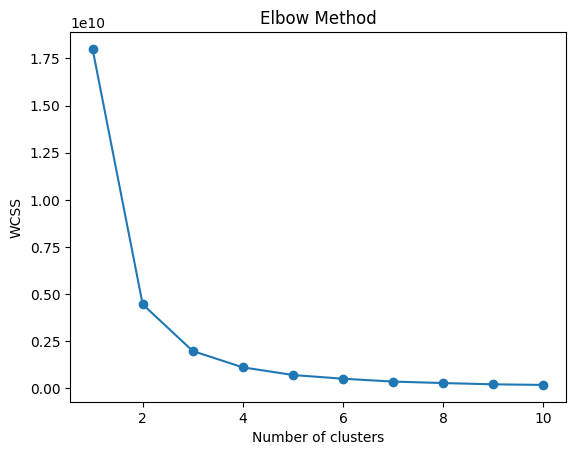

In [65]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_pca)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [66]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_pca)
cluster_labels = kmeans.labels_
df['Cluster'] = cluster_labels

homogeneity = metrics.homogeneity_score(df['Cluster'], kmeans.labels_)
completeness = metrics.completeness_score(df['Cluster'], kmeans.labels_)
v_measure = metrics.v_measure_score(df['Cluster'], kmeans.labels_)
adjusted_rand = metrics.adjusted_rand_score(df['Cluster'], kmeans.labels_)
silhouette = metrics.silhouette_score(df_pca, kmeans.labels_, sample_size=1000)

print("Homogeneity: %0.3f" % homogeneity)
print("Completeness: %0.3f" % completeness)
print("V-measure: %0.3f" % v_measure)
print("Adjusted Rand-Index: %.3f" % adjusted_rand)
print("Silhouette Coefficient: %0.3f" % silhouette)

Homogeneity: 1.000
Completeness: 1.000
V-measure: 1.000
Adjusted Rand-Index: 1.000
Silhouette Coefficient: 0.579


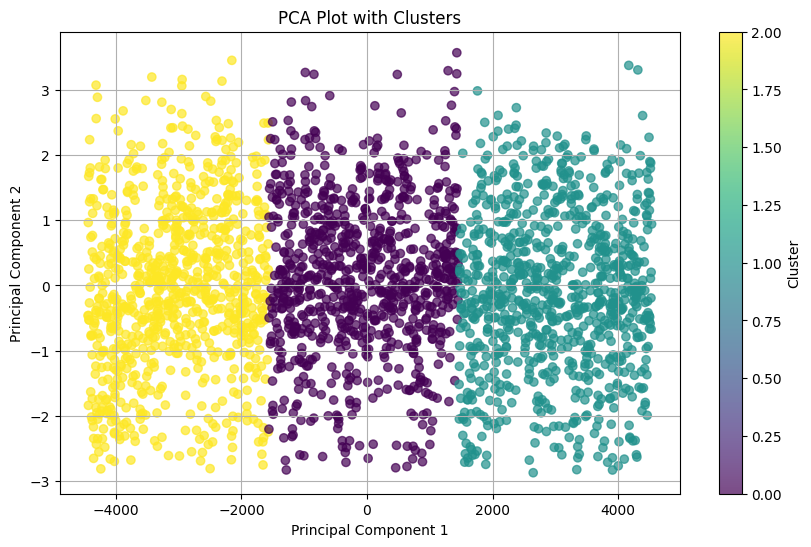

In [67]:
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=cluster_labels, cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.title('PCA Plot with Clusters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [68]:
cluster_sizes = df['Cluster'].value_counts()
cluster_centers = kmeans.cluster_centers_

print("Cluster Sizes:")
print(cluster_sizes)
print("Cluster Centroids:")
print(cluster_centers)

Cluster Sizes:
Cluster
1    892
0    874
2    861
Name: count, dtype: int64
Cluster Centroids:
[[-9.01829147e+01  1.50819760e-01]
 [ 2.99990697e+03 -1.03140439e-01]
 [-3.04790490e+03 -4.62073097e-02]]
